# Business Proposal

Business problem: What are the best 5 zip codes to invest in?

Business - A real estate investment firm looking to acquire new property to invest in.

Focus - Investing in real estate for high growth zip codes.

Narrowing down zip codes - Look to see where everyone is trying to move to. Find the highest historic ROI from the past 10 years.

Chosen State: Idaho
 - Based off of Census and other surveys deciding to go with Idaho.

Ways to narrow down zipcodes
 - set certain price limits
 - look at cities
     - maybe look at what cities people are moving to
 - look at states
     - maybe look at what states people are moving to
 - look at ROI per county/city/state
 - get rid of any entries that aren't part of a metro
 - get rid of entries that have less than 10 years of data

# Loading all necessary packages and loading data file

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [2]:
data = pd.read_csv("Data/zillow_data.csv")

# EDA

In [3]:
data.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [4]:
data.tail()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400
14722,95851,89155,Mesquite,NV,Las Vegas,Clark,14723,176400.0,176300.0,176100.0,...,333800,336400,339700,343800,346800,348900,350400,353000,356000,357200


In [5]:
data.shape

(14723, 272)

## General info about the dataset

In [6]:
print('The data has {} number of entries. The number of unique RegionNames is {}.'.format(data.shape[0],data['RegionName'].nunique()))
print('So there seems to be no duplicate entries.')

The data has 14723 number of entries. The number of unique RegionNames is 14723.
So there seems to be no duplicate entries.


In [7]:
print('This dataset looks at {} different "states" (includes DC).'.format(data['State'].nunique()))

This dataset looks at 51 different "states" (includes DC).


In [8]:
print('This dataset looks at median prices of houses of a given zipcode from 1996-04 to 2018-04.')

This dataset looks at median prices of houses of a given zipcode from 1996-04 to 2018-04.


## Looking at missing values in the dataframe

In [9]:
#Seeing how many na values are in the dataset
print('There are {} Nan values in the dataset.'.format(data.isna().sum().sum()))

There are 157934 Nan values in the dataset.


In [52]:
#Checking to see what columns have na values.
column_names = data.columns
na_columns = []
for name in column_names:
    NumberOfNa = 0
    NumberOfNa = data[name].isna().sum()
    if NumberOfNa > 0:
        na_columns.append(name)
print('There are {} columns that have na values.'.format(len(na_columns)))
print('Only identifier column with na is "Metro", the others are missing values for dates')

There are 220 columns that have na values.
Only identifier column with na is "Metro", the others are missing values for dates


In [53]:
#Looking at the entries with Nan values for Metro
len(data.loc[lambda x: x.Metro.isna()])
data.loc[lambda x: x.Metro.isna()].head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
151,69340,27410,Greensboro,NC,NaN,Guilford,152,137100.0,136600.0,136000.0,...,212900,213200,213600,214300,215100,216200,217700,219600,221000,221500
167,69336,27406,Greensboro,NC,NaN,Guilford,168,80900.0,80700.0,80400.0,...,109700,107900,106700,107200,107900,108700,109500,110000,110700,111300
491,69270,27265,High Point,NC,NaN,Guilford,492,108000.0,107700.0,107400.0,...,159300,157400,156300,156600,156700,156600,156800,157000,157400,157800
526,69337,27407,Greensboro,NC,NaN,Guilford,527,93900.0,93700.0,93400.0,...,122000,120800,119800,119800,120300,121100,122200,123100,124000,124900
695,69335,27405,Greensboro,NC,NaN,Guilford,696,74100.0,73900.0,73800.0,...,91500,90200,89000,88700,88900,89700,91000,92100,93100,93700


In [56]:
# We can drop all the identifiers besides State, City and RegionName (Zipcode)
data_ZipcodeID = data.drop(['RegionID', 'Metro', 'CountyName', 'SizeRank'], axis=1)

In [13]:
# Creating a Dataframe with all entries that have any NA values
null_data = data_ZipcodeID[data_ZipcodeID.isnull().any(axis=1)]
print(len(null_data))
null_data.head()

1039


,RegionName,State,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
20,10011,NY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12137600,12112600,12036600,12050100,12016300,11946500,11978100,11849300,11563000,11478300
36,10456,NY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,357900,357100,356500,357200,362000,368500,374100,379800,388100,394400
105,60611,IL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1475200,1473900,1469500,1472100,1477800,1486000,1497300,1508600,1508100,1493200
156,11238,NY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2673300,2696700,2716500,2724000,2744300,2768900,2810700,2848100,2869600,2885300
232,27834,NC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100100,98700,97400,96100,95900,96300,97000,98300,100200,101200


A lot of the Nan values seem to be coming from possible newer properties that have been built.

In [14]:
print('The newest zipcode property, aka the last timestamp that has any nan value is {}.'.format(
    null_data.columns[null_data.isnull().any()][-1]))

The newest zipcode property, aka the last timestamp that has any nan value is 2014-06.


## Lets narrow the dataset to just Idaho before continuing on EDA

In [97]:
# Creating Idaho dataframe
Idaho = data_ZipcodeID[data_ZipcodeID['State'] == 'ID']
Idaho.head()

,RegionName,City,State,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
448,83301,Twin Falls,ID,94100.0,94100.0,94200.0,94200.0,94300.0,94400.0,94700.0,...,164300,164700,164900,166400,170000,173800,176400,177800,178800,179800
596,83709,Boise,ID,118900.0,118800.0,118700.0,118500.0,118400.0,118300.0,118400.0,...,242200,251800,261200,263500,261100,257000,255200,255100,256200,256600
1178,83686,Nampa,ID,99500.0,99400.0,99400.0,99400.0,99500.0,99600.0,99900.0,...,187100,188700,191300,193500,194500,195100,196300,198100,200000,201300
1343,83704,Boise,ID,94600.0,94500.0,94400.0,94300.0,94400.0,94600.0,95000.0,...,199000,196400,196700,200900,204900,206500,207700,210200,213800,215900
1406,83854,Post Falls,ID,105600.0,105200.0,104900.0,104700.0,104700.0,104900.0,105400.0,...,233400,235000,237600,239800,241000,242600,244300,247100,251600,255100


In [98]:
# Creating a Dataframe with all entries that have any NA values for Idaho
Idaho_null = Idaho[Idaho.isnull().any(axis=1)]
print('There are {} zip codes on record for Idaho.'.format(len(Idaho)))
print('There are {} zip codes that have missing entries'.format(len(Idaho_null)))
Idaho_null.head()

There are 110 zip codes on record for Idaho.
There are 15 zip codes that have missing entries


,RegionName,City,State,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
7742,83333,Hailey,ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,318000,319800,321700,324800,328400,331600,332800,335300,340900,345200
8131,83340,Ketchum,ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,914100,919400,921200,921600,921600,923000,924200,925200,931700,942200
9232,83263,Preston,ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,200600,202100,203100,203800,205000,206500,208000,208600,208100,207300
11485,83353,Sun Valley,ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1207800,1215100,1221400,1227900,1235500,1245000,1253000,1260600,1273700,1286200
11532,83655,New Plymouth,ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,174200,175400,177200,179300,181300,182400,183000,184500,187600,189700


In [99]:
print('The newest Idaho zipcode property, aka the last timestamp that has any nan value is {}.'.format(
    Idaho_null.columns[Idaho_null.isnull().any()][-1]))

The newest Idaho zipcode property, aka the last timestamp that has any nan value is 2011-12.


In [108]:
#Dropping any zipcodes that do not have 10 years worth of data
Idaho = Idaho.drop(Idaho[Idaho['2008-04'].isnull()].index)

#Dropping columns for any previous data older than 10 years.
Idaho.dropna(axis=1, how='any', inplace=True)

print('2 of the Idaho zipcodes did not meet the 10 years worth of data requirement.')
print('The new number of zipcodes of the dataframe is {}.'.format(len(Idaho)))
print('The Idaho dataset now has no nan values and spans from {} to {}'.format(Idaho.columns[3],Idaho.columns[-1]))

2 of the Idaho zipcodes did not meet the 10 years worth of data requirement.
The new number of zipcodes of the dataframe is 108.
The Idaho dataset now has no nan values and spans from 2006-01 to 2018-04


In [109]:
Idaho.head()

,RegionName,City,State,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
448,83301,Twin Falls,ID,132400.0,133100.0,134100.0,135300.0,136500.0,137800.0,139200.0,140600.0,142100.0,143700.0,145300.0,146700.0,147900.0,148700.0,149400.0,150000.0,150300.0,150400.0,150500.0,150500.0,150400.0,150300.0,150400.0,150400.0,150200.0,149800.0,149400.0,148900.0,148000.0,146800.0,145700.0,144700.0,143800.0,143000.0,142300.0,141700.0,141200.0,140600.0,140300.0,140000.0,139400.0,138300.0,137200.0,135800.0,134500.0,133500.0,132600.0,132100.0,131900.0,132100.0,131500.0,130000.0,128900.0,128600.0,128000.0,126800.0,125400.0,124100.0,122700.0,121000.0,119400.0,118000.0,116800.0,116100.0,116100.0,116400.0,116600.0,116700.0,116900.0,117000.0,116800.0,116900.0,117200.0,117300.0,117300.0,117600.0,118200.0,118900.0,119100.0,119300.0,119700.0,120200.0,120700.0,121300.0,122200.0,123200.0,124200.0,125100.0,126100.0,126700.0,128600.0,132900.0,137400.0,140400.0,142500.0,143700.0,144600.0,145300.0,145800.0,146400.0,147200.0,148200.0,148800,148600,148200,147800,147200,146500,145300,144800,146100,148100,149400,150400,151100,151100,151300,151800,152200,153000,154400,155700,156600,157400,158100,158800,159500,159500,158900,159000,160100,161300,162400,163500,164300,164400,164200,164100,164300,164700,164900,166400,170000,173800,176400,177800,178800,179800
596,83709,Boise,ID,199200.0,203300.0,207200.0,211500.0,215900.0,220000.0,223300.0,225300.0,225800.0,225000.0,223700.0,222500.0,221700.0,220600.0,219500.0,218800.0,218400.0,217900.0,217600.0,217500.0,217400.0,217400.0,217300.0,217300.0,217600.0,217600.0,217100.0,216500.0,215600.0,213800.0,211500.0,208800.0,206200.0,203700.0,201300.0,199100.0,197400.0,195500.0,193300.0,191000.0,188700.0,186100.0,183900.0,182200.0,180700.0,179300.0,178100.0,176800.0,173900.0,173200.0,173800.0,172700.0,170600.0,170200.0,169200.0,167700.0,165900.0,164300.0,163200.0,162300.0,161700.0,159800.0,157300.0,155400.0,153500.0,151300.0,150100.0,149300.0,148600.0,148500.0,148200.0,147000.0,146100.0,146400.0,147000.0,147800.0,148900.0,149700.0,150100.0,150600.0,151600.0,152900.0,154300.0,156100.0,158200.0,159400.0,160200.0,161900.0,164700.0,168200.0,171800.0,174700.0,176900.0,178400.0,180400.0,183100.0,185000.0,186000.0,187300.0,188600.0,189300.0,189500.0,189300,188600,187900,187600,187700,188700,190600,192200,193100,194200,196000,198000,199500,200300,200700,201700,203300,204800,206200,207900,209300,210800,212000,213300,214300,214900,216200,218100,219900,221400,223400,225600,228500,231900,235200,237000,242200,251800,261200,263500,261100,257000,255200,255100,256200,256600
1178,83686,Nampa,ID,147100.0,148000.0,149400.0,151500.0,153800.0,156300.0,158900.0,161400.0,164100.0,166500.0,168800.0,170900.0,172600.0,173800.0,174900.0,176200.0,177600.0,178500.0,178900.0,179200.0,179800.0,180600.0,181400.0,182300.0,183000.0,182900.0,182400.0,181800.

In [110]:
#Looking at the distribution of Prices
Idaho['2018-04'].describe()

count    1.080000e+02
mean     2.376306e+05
std      1.467115e+05
min      8.380000e+04
25%      1.667250e+05
50%      2.072500e+05
75%      2.567000e+05
max      1.286200e+06
Name: 2018-04, dtype: float64

## Stopped here

In [19]:
def ROI_Column(df):
    Number_of_rows=df.shape[0]
    ROI_Col = []

    for row in list(range(Number_of_rows)):
        i = 2
        
        #To find the oldest entry
        while pd.isna(df.iloc[row][i]):
            i+=1
        
        #Calculating the ROI
        ROI_Col.append((df.iloc[row][-1] - df.iloc[row][i])/df.iloc[row][i])
        
    #Adding the new ROI Column        
    df['ROI'] = ROI_Col
    
    return df

In [20]:
test2 = ROI_Column(data_ZipcodeID)
test2.head()

,RegionName,State,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI
0,60657,IL,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,...,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600,2.083782
1,75070,TX,235700.0,236900.0,236700.0,235400.0,233300.0,230600.0,227300.0,223400.0,...,310000,312500,314100,315000,316600,318100,319600,321100,321800,0.365295
2,77494,TX,210400.0,212200.0,212200.0,210700.0,208300.0,205500.0,202500.0,199800.0,...,320600,320200,320400,320800,321200,321200,323000,326900,329900,0.567966
3,60614,IL,498100.0,500900.0,503100.0,504600.0,505500.0,505700.0,505300.0,504200.0,...,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000,1.623971
4,79936,TX,77300.0,77300.0,77300.0,77300.0,77400.0,77500.0,77600.0,77700.0,...,119400,120000,120300,120300,120300,120300,120500,121000,121500,0.571798


In [21]:
#Maybe not best to do ROI from way back when, dont want to be holding property for 22 years.
#Maybe do ROI from the latest 10 years?

## Looking at latest price distribution of each zipcode

In [22]:
data['2018-04'].describe()

count    1.472300e+04
mean     2.880399e+05
std      3.720544e+05
min      1.380000e+04
25%      1.324000e+05
50%      1.981000e+05
75%      3.211000e+05
max      1.789490e+07
Name: 2018-04, dtype: float64

In [23]:
data['2018-04'].min()

13800

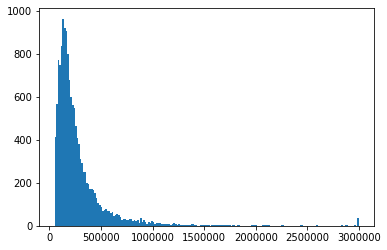

In [24]:
# Shows the hist plot of zipcodes with prices between 50,000-3,000,000
plt.hist(np.clip(data['2018-04'], 50000, 3000000), bins='auto');

## Playground

To do:
- look at trends
- maybe look in rolling mean
- zoom in annomalies?

In [25]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[1:], format='%Y-%m')

In [26]:
def melt_data(df):
    
    #Makes the individual time columns into one column and each different time into individual rows
    melted = pd.melt(df, id_vars=['RegionName', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    
    #Turns time column into the right date time format
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    
    #Drops the na values from the value column
    melted = melted.dropna(subset=['value'])
    
    #Groups all rows by time and calculates the mean across each entry for that time
    return melted.groupby('time').aggregate({'value':'mean'}) 

In [27]:
df = melt_data(data.drop(labels=['RegionID','SizeRank'], axis=1))

In [28]:
df.head(20)

,value
time,
1996-04-01,118299.123063
1996-05-01,118419.044139
1996-06-01,118537.423268
1996-07-01,118653.069278
1996-08-01,118780.254312
1996-09-01,118927.528500
1996-10-01,119120.520316
1996-11-01,119345.352236
1996-12-01,119685.084771


In [29]:
df.shape

(265, 1)

In [30]:
rent = pd.read_csv('Data/Metro_ZORI_AllHomesPlusMultifamily_SSA.csv')
rent.head()

,RegionID,RegionName,SizeRank,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,...,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02
0,102001,United States,0,1373.0,1380.0,1387.0,1395.0,1402.0,1409,1416,...,1743,1744,1745,1746,1746,1747,1748,1748,1749,1750
1,394913,"New York, NY",1,2394.0,2406.0,2418.0,2430.0,2442.0,2454,2466,...,2755,2732,2710,2688,2665,2643,2619,2595,2572,2548
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,1822.0,1839.0,1856.0,1873.0,1889.0,1906,1922,...,2551,2550,2548,2547,2546,2545,2544,2542,2541,2540
3,394463,"Chicago, IL",3,1508.0,1514.0,1519.0,1525.0,1531.0,1536,1542,...,1762,1757,1753,1749,1744,1740,1735,1731,1726,1722
4,394514,"Dallas-Fort Worth, TX",4,1189.0,1196.0,1204.0,1211.0,1218.0,1225,1232,...,1553,1555,1558,1561,1563,1566,1569,1572,1575,1578


In [31]:
len(rent)

106

In [34]:
Idaho = test2[test2['State']=='ID']
len(Idaho)

110

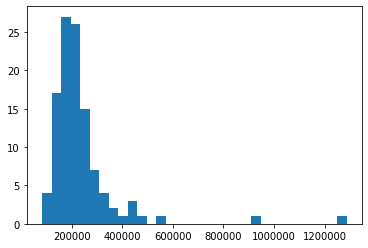

In [36]:
plt.hist(np.clip(Idaho['2018-04'], 50000, 3000000), bins='auto');

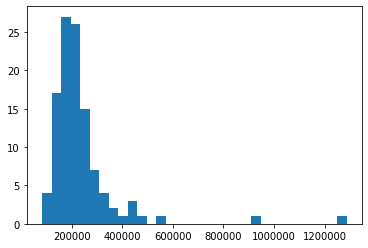

In [38]:
plt.hist(Idaho['2018-04'], bins='auto');

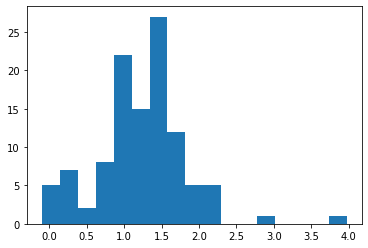

In [41]:
plt.hist(Idaho['ROI'],bins='auto');

In [45]:
Idaho['2018-04'].describe()

count    1.100000e+02
mean     2.361000e+05
std      1.458002e+05
min      8.380000e+04
25%      1.645500e+05
50%      2.068500e+05
75%      2.562250e+05
max      1.286200e+06
Name: 2018-04, dtype: float64

In [49]:
migration = pd.read_excel('Data/State_to_State_Migrations_Table_2019.xls')

In [50]:
migration.head()

,"Table with row headers in column A, L, W, AH, AS, BD, BO, BZ, CK, CV, and DG, and column headers in rows 6 through 8 and 45 through 47.",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129
0,Table 1. State-to-State Migration Flows1: 2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Table 1. State-to-State Migration Flows1: 2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Dataset: 2019 American Community Survey 1-Year...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Dataset: 2019 American Community Survey 1-Year...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Universe: Population 1 year and over,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Universe: Population 1 year and over,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Current residence in,Population 1 year and over,NaN,Same house 1 year ago,NaN,Same state of residence 1 year ago,NaN,Different state of residence 1 year ago,NaN,NaN,...,NaN,Current residence in,Abroad 1 year ago,NaN,NaN,NaN,NaN,NaN,NaN,NaN
